In [1]:
import tensorflow as tf

C:\Users\88016\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.13.1'

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'tensorflow._api.v1.keras.datasets.mnist' from 'C:\\Users\\88016\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v1\\keras\\datasets\\mnist\\__init__.py'>

In [5]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

### Normalize the X_train & X_test

In [6]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [7]:
print(X_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
print(X_test[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print(y_train[2])

4


In [10]:
print(y_test[2])

1


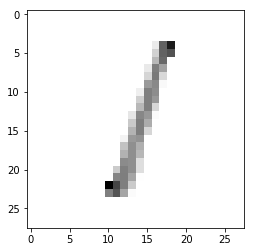

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_test[2], cmap = plt.cm.binary) ## I can also use black and white image.
plt.show() ## After normalize pic should be shadow but its very easy to find the edge.

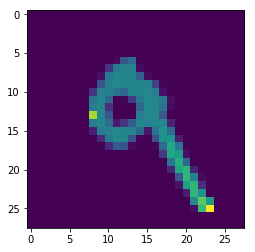

In [12]:
plt.imshow(X_test[7])
plt.show()

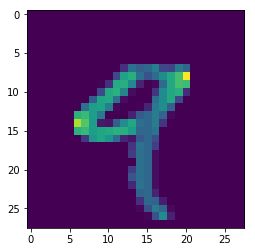

In [13]:
plt.imshow(X_train[4])
plt.show()

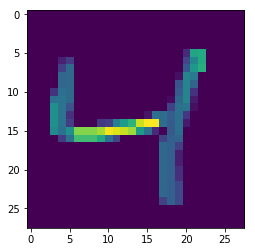

In [14]:
plt.imshow(X_train[2])
plt.show()

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [16]:
## Compile the ANN 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
## Fitting the ANN to Training set :
model.fit(X_train, y_train, batch_size = 10, nb_epoch = 5)

Epoch 1/5
60000/60000 [==============================] - 20s 326us/sample - loss: 0.2189 - acc: 0.9340
Epoch 2/5
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0967 - acc: 0.9698
Epoch 3/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.0677 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 18s 299us/sample - loss: 0.0519 - acc: 0.9832
Epoch 5/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0404 - acc: 0.9865


In [ ]:
val_loss, val_acc = model.evaluate(X_test, y_test)

In [ ]:
print(val_loss, val_acc)

In [ ]:
model.save('epic_number_reader.model')

In [ ]:
new_model = tf.keras.models.load_model('epic_number_reader.model')

In [ ]:
predictions = new_model.predict(X_test)

In [ ]:
predictions

In [ ]:
import numpy as np

In [ ]:
print(np.argmax(predictions[0]))

In [ ]:
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(np.argmax(predictions[2]))

In [ ]:
plt.imshow(X_test[2])
plt.show()